<a href="https://colab.research.google.com/github/LuciferX45/EDA-of-CIPLA-Stock/blob/main/RPET_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIPLA Stock Analysis** 

**Gautam Padhi-I034**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Retrieving the Data**

In [ ]:
  #Loading CIPLA data

data = pd.read_csv("CIPLA.csv")

#Printing first 10 rows

data.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN
5,2000-01-10,CIPLA,EQ,1247.55,1288.0,1299.00,1191.00,1197.15,1205.90,1222.23,105912,1.294485e+13,NaN,NaN,NaN
6,2000-01-11,CIPLA,EQ,1205.90,1225.0,1225.00,1109.45,1125.00,1114.25,1156.31,186975,2.162003e+13,NaN,NaN,NaN
7,2000-01-12,CIPLA,EQ,1114.25,1185.0,1203.40,1185.00,1203.40,1203.40,1202.76,7416,8.919696e+11,NaN,NaN,NaN
8,2000-01-13,CIPLA,EQ,1203.40,1299.7,1299.70,1281.20,1299.70,1297.05,1298.53,90379,1.173602e+13,NaN,NaN,NaN
9,2000-01-14,CIPLA,EQ,1297.05,1299.0,1304.55,1220.00,1275.00,1280.70,1275.38,70729,9.020602e+12,NaN,NaN,NaN


In [ ]:
#Counting rows and columns

data.shape

(5306, 15)

In [ ]:
#Finding the data specific to numerical columns

data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,540.503798,541.457755,549.587693,532.143583,540.472588,540.421052,540.931589,1.550071e+06,7.841696e+13,44967.250407,7.408486e+05,0.509209
std,289.319810,289.955959,295.087710,283.868905,289.158087,289.151156,289.411215,2.317962e+06,1.620908e+14,43776.047324,7.339493e+05,0.154639
min,160.100000,150.550000,169.450000,145.000000,152.000000,160.100000,158.140000,5.050000e+02,5.400606e+10,613.000000,2.013000e+03,0.069300
25%,309.025000,309.962500,312.750000,305.350000,309.000000,309.025000,309.290000,3.790408e+05,1.447839e+13,21724.000000,2.831312e+05,0.404575
50%,473.850000,474.625000,479.950000,468.875000,473.525000,473.850000,475.215000,1.047786e+06,3.725861e+13,32967.000000,5.787145e+05,0.516650
75%,681.937500,683.225000,691.787500,671.675000,681.937500,681.937500,682.035000,1.815542e+06,7.848478e+13,50869.500000,9.761000e+05,0.615125
max,1465.250000,1537.000000,1537.000000,1430.000000,1466.050000,1465.250000,1460.430000,5.689556e+07,4.498902e+15,603361.000000,1.081558e+07,0.994500


In [ ]:
#Finding total volume
data["Volume"].value_counts()

39424      2
59707      2
787196     2
1137084    2
105912     2
          ..
2282638    1
603504     1
4859250    1
4244906    1
548864     1
Name: Volume, Length: 5298, dtype: int64

In [ ]:
#Dropping the empty values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [ ]:
#Since series and symbols have no use we drop them
data=data.drop(['Series','Symbol'], axis=1)
data.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [ ]:
data.shape

(5306, 13)

In [ ]:
data.isnull().sum()

Date                     0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [ ]:
#Dropping the NA 
data = data.dropna()
data=data.reset_index()

In [ ]:
data.isnull().sum()

index                 0
Date                  0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

# **Analysing the Data**

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] =(9,5)
plt.rcParams['figure.facecolor']= '#00000000'

In [ ]:
start_date = "2019-04-30"
end_date = "2021-04-30"

mask = (data['Date'] >= start_date) & (data['Date'] <= end_date)
data1 = data.loc[mask]
data1 = data1.reset_index()
data1 = data1.drop(['index'], axis=1)
data1

,level_0,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1959,2019-04-30,567.95,569.90,571.05,558.65,563.00,565.00,563.87,1914026,1.079265e+14,34234.0,950719.0,0.4967
1,1960,2019-05-02,565.00,563.00,569.70,556.70,568.00,565.60,563.21,1700976,9.580023e+13,31137.0,637179.0,0.3746
2,1961,2019-05-03,565.60,568.00,573.00,561.65,562.95,564.50,566.80,2758638,1.563608e+14,31378.0,1329400.0,0.4819
3,1962,2019-05-06,564.50,556.00,564.50,556.00,564.00,563.35,561.26,1715311,9.627403e+13,38504.0,788643.0,0.4598
4,1963,2019-05-07,563.35,564.00,566.30,555.15,557.25,557.95,560.62,1478212,8.287169e+13,27928.0,724475.0,0.4901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2451,2021-04-26,935.60,935.60,940.00,902.15,907.95,905.40,914.11,10255697,9.374885e+14,161321.0,3451318.0,0.3365
493,2452,2021-04-27,905.40,913.00,919.50,901.00,911.20,912.40,909.22,5669049,5.154420e+14,120188.0,1126288.0,0.1987
494,2453,2021-04-28,912.40,914.35,918.00,902.95,906.25,910.20,909.94,7251009,6.597970e+14,134413.0,1772739.0,0.2445
495,2454,2021-04-29,910.20,911.95,917.40,904.00,906.00,906.50,910.22,4953091,4.508421e+14,88604.0,1122534.0,0.2266


In [ ]:
data1=data1.drop(['level_0'], axis=1)

In [ ]:
data1.index

RangeIndex(start=0, stop=497, step=1)

In [ ]:
data1.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02,4.970000e+02,497.000000,4.970000e+02,497.000000
mean,620.833702,622.829175,631.756439,612.925151,621.701610,621.522636,622.585694,5.432496e+06,3.632459e+14,90668.698189,1.387970e+06,0.302895
std,149.878312,151.129280,152.632436,148.987830,150.618995,150.420695,150.843454,5.210360e+06,3.975980e+14,71558.697575,1.043254e+06,0.122210
min,374.700000,370.000000,390.750000,355.300000,374.750000,374.700000,376.810000,1.796120e+05,8.291024e+12,3975.000000,4.670200e+04,0.069300
25%,471.600000,472.000000,478.300000,465.500000,471.000000,471.600000,471.620000,2.217428e+06,1.079265e+14,43339.000000,7.004470e+05,0.208300
50%,592.350000,598.000000,608.800000,585.000000,593.550000,592.850000,597.510000,4.109355e+06,2.608694e+14,72627.000000,1.133461e+06,0.286100
75%,763.200000,766.100000,778.000000,756.300000,763.900000,764.000000,765.640000,6.772345e+06,4.734505e+14,112472.000000,1.696215e+06,0.378500
max,949.300000,965.100000,966.350000,941.100000,951.000000,949.300000,951.800000,5.689556e+07,4.498902e+15,603361.000000,7.851191e+06,0.664500


# **Plotting Stock Price**

<function matplotlib.pyplot.show>

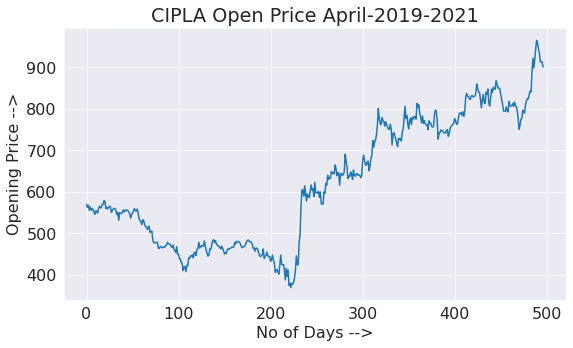

In [ ]:
data1['Open'].plot()
plt.title("CIPLA Open Price April-2019-2021")
plt.xlabel("No of Days -->")
plt.ylabel("Opening Price -->")
plt.show

<function matplotlib.pyplot.show>

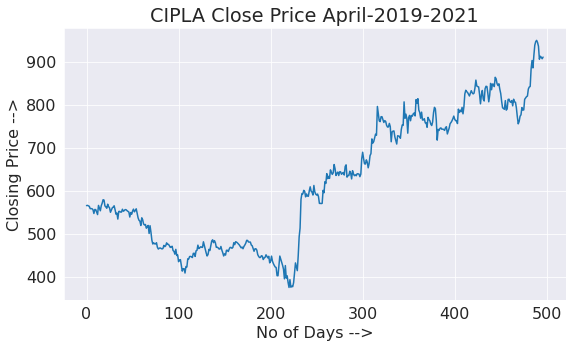

In [ ]:
data1['Close'].plot()
plt.title("CIPLA Close Price April-2019-2021")
plt.xlabel("No of Days -->")
plt.ylabel("Closing Price -->")
plt.show

In [ ]:
AvgHigh = data1.describe()['High']['mean']
AvgLow = data1.describe()['Low']['mean']
AvgVolume = data1.describe()['Volume']['mean']
AvgDeliverable_volume=data1.describe()['Deliverable Volume']['mean']

print("Average High CIPLA Stock: ",AvgHigh,
     "\nAverage Low CIPLA: ",AvgLow,
     "\nAverage Volume for CIPLA: ", AvgVolume,
     "\nAverage Deliverable Volume of CIPLA: ", AvgDeliverable_volume)

Average High CIPLA Stock:  631.7564386317907 
Average Low CIPLA:  612.9251509054326 
Average Volume for CIPLA:  5432496.203219316 
Average Deliverable Volume of CIPLA:  1387970.018108652


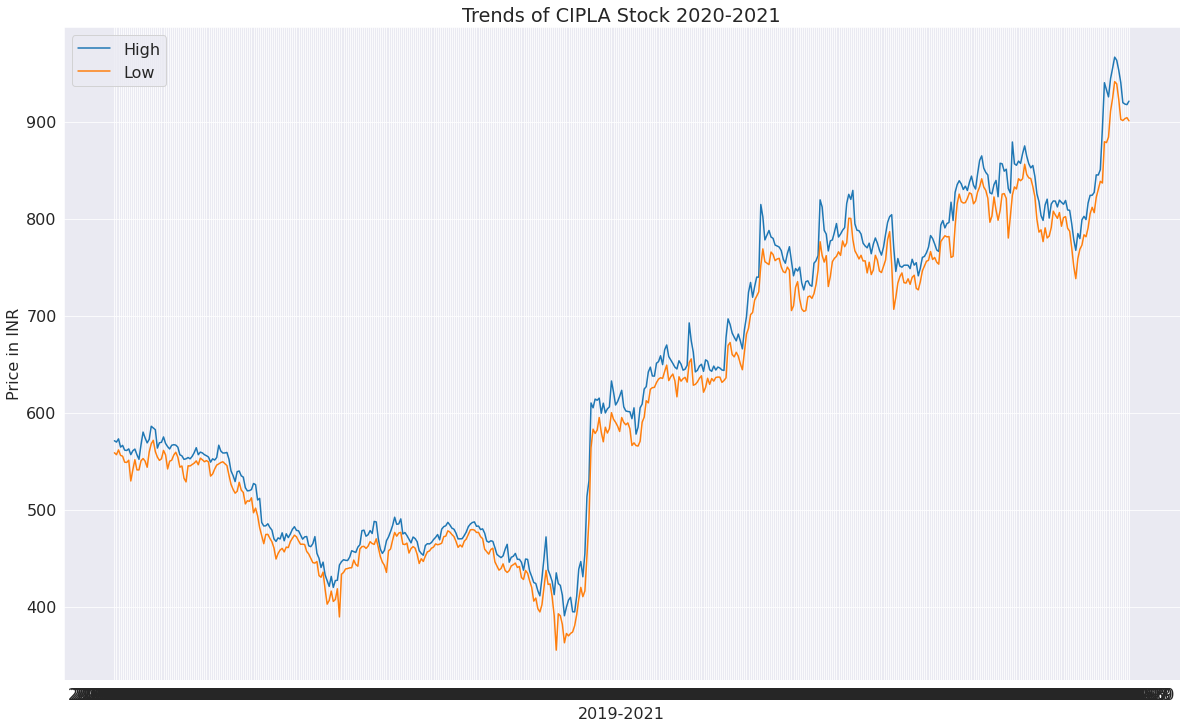

In [ ]:
plt.figure(figsize=(20,12));
plt.plot(data1.Date, data1.High);
plt.plot(data1.Date, data1.Low);
plt.title("Trends of CIPLA Stock 2020-2021");
plt.xlabel('2019-2021');
plt.ylabel('Price in INR');
plt.legend(['High','Low']);

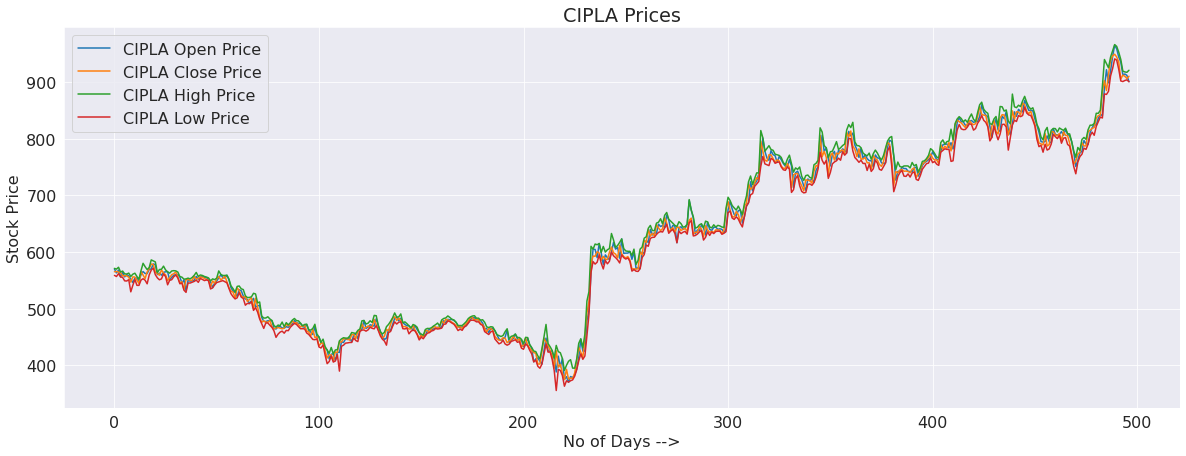

In [ ]:
plt.figure(figsize=(20,7));
data1['Open'].plot(label = 'CIPLA Open Price')
data1['Close'].plot(label = 'CIPLA Close Price')
data1['High'].plot(label= 'CIPLA High Price')
data1['Low'].plot(label= 'CIPLA Low Price')
plt.legend()
plt.title('CIPLA Prices')
plt.xlabel("No of Days -->")
plt.ylabel("Stock Price")
plt.show()

In trading, high is the maximum value the stock reaches

Close is the value of the stock at the closing time of the market in the same period

Now considering the data we can figure out an optimal entry point into the stock

Text(0, 0.5, 'No of Times -->')

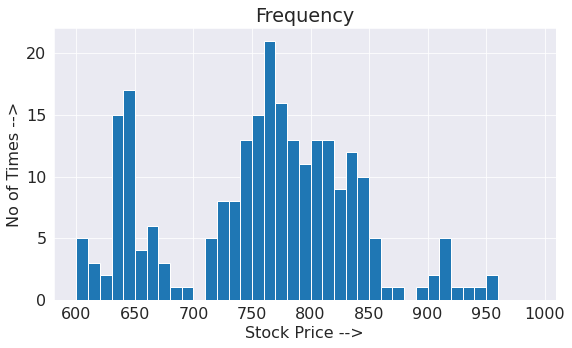

In [ ]:
plt.hist(data1.VWAP,bins=np.arange(600,1000,10))
plt.title("Frequency")
plt.xlabel("Stock Price -->")
plt.ylabel("No of Times -->")

Here we can see the frequncies of the different prices

The 770 price is the most frequent

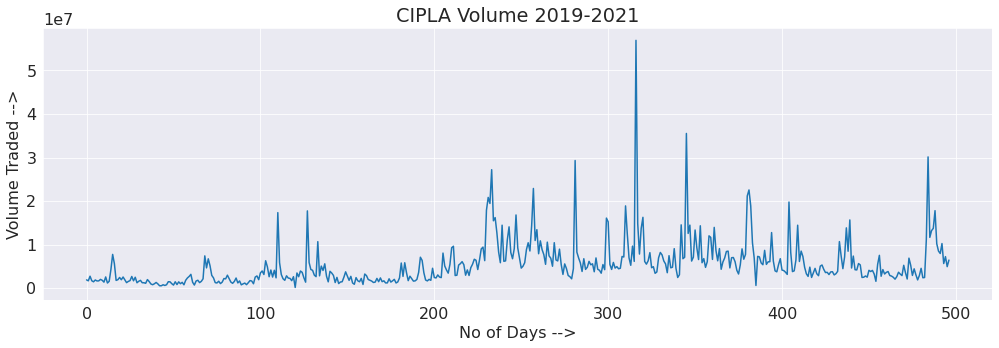

In [ ]:
data1['Volume'].plot(figsize=(17,5))
plt.title("CIPLA Volume 2019-2021")
plt.xlabel("No of Days -->")
plt.ylabel("Volume Traded -->")
plt.show()


In [ ]:
#Max volume in a day
data1.iloc[[data1['Volume'].argmax()]]

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
316,2020-08-10,728.65,760.0,814.5,751.35,797.7,795.6,790.73,56895564,4.498902e+15,603361.0,6055265.0,0.1064


Text(0, 0.5, 'Stock Price -->')

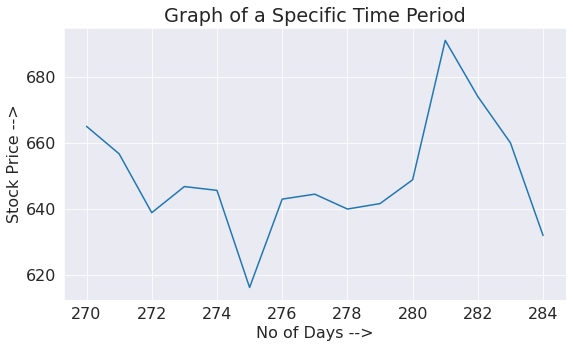

In [ ]:
spike = data1.iloc[270:285] #few months into the pandemic
spike['Open'].plot()
plt.title("Graph of a Specific Time Period")
plt.xlabel("No of Days -->")
plt.ylabel("Stock Price -->")

Text(0, 0.5, 'Stock Price -->')

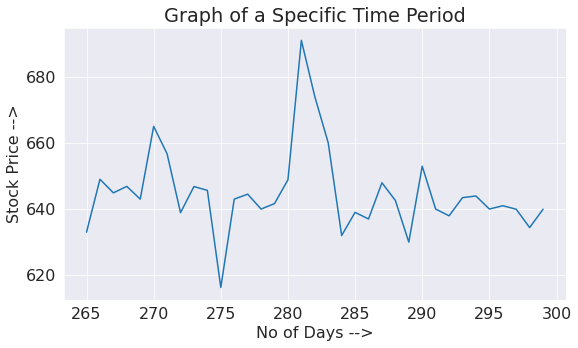

In [ ]:
data1.iloc[265:300]['Open'].plot()
plt.title("Graph of a Specific Time Period")
plt.xlabel("No of Days -->")
plt.ylabel("Stock Price -->")

In [ ]:
data1.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
0,2019-04-30,567.95,569.9,571.05,558.65,563.00,565.00,563.87,1914026,1.079265e+14,34234.0,950719.0,0.4967,963307.0
1,2019-05-02,565.00,563.0,569.70,556.70,568.00,565.60,563.21,1700976,9.580023e+13,31137.0,637179.0,0.3746,1063797.0
2,2019-05-03,565.60,568.0,573.00,561.65,562.95,564.50,566.80,2758638,1.563608e+14,31378.0,1329400.0,0.4819,1429238.0
3,2019-05-06,564.50,556.0,564.50,556.00,564.00,563.35,561.26,1715311,9.627403e+13,38504.0,788643.0,0.4598,926668.0
4,2019-05-07,563.35,564.0,566.30,555.15,557.25,557.95,560.62,1478212,8.287169e+13,27928.0,724475.0,0.4901,753737.0


In [ ]:
#Top 10 highest prices
high_10_price = data1.sort_values(by='High', ascending=False).head(10)
high_10_price

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
489,2021-04-20,946.30,965.10,966.35,941.10,951.00,949.30,951.80,10205616,9.713696e+14,157298.0,1904032.0,0.1866,8301584.0
490,2021-04-22,949.30,958.80,963.15,938.85,945.50,944.35,951.75,8522208,8.111023e+14,153862.0,2502617.0,0.2937,6019591.0
488,2021-04-19,938.05,945.25,955.00,924.00,950.00,946.30,945.66,17805574,1.683793e+15,315326.0,3365829.0,0.1890,14439745.0
491,2021-04-23,944.35,944.35,952.85,922.75,936.40,935.60,934.36,7972589,7.449235e+14,139014.0,1545821.0,0.1939,6426768.0
487,2021-04-16,914.20,919.75,944.25,910.90,940.10,938.05,929.61,13746268,1.277868e+15,221996.0,5019694.0,0.3652,8726574.0
484,2021-04-12,883.05,890.00,940.00,879.15,907.00,902.40,913.81,30141861,2.754402e+15,516625.0,3403805.0,0.1129,26738056.0
492,2021-04-26,935.60,935.60,940.00,902.15,907.95,905.40,914.11,10255697,9.374885e+14,161321.0,3451318.0,0.3365,6804379.0
485,2021-04-13,902.40,921.95,932.60,878.30,889.00,885.20,899.74,11667200,1.049746e+15,185356.0,1657842.0,0.1421,10009358.0
486,2021-04-15,885.20,898.80,925.40,883.90,914.00,914.20,912.14,13218002,1.205673e+15,254586.0,1195634.0,0.0905,12022368.0
496,2021-04-30,906.50,900.75,921.00,900.75,910.00,910.35,911.47,6459737,5.887824e+14,121466.0,2004555.0,0.3103,4455182.0


Text(0.5, 1.0, '10 Highest price of CIPLA')

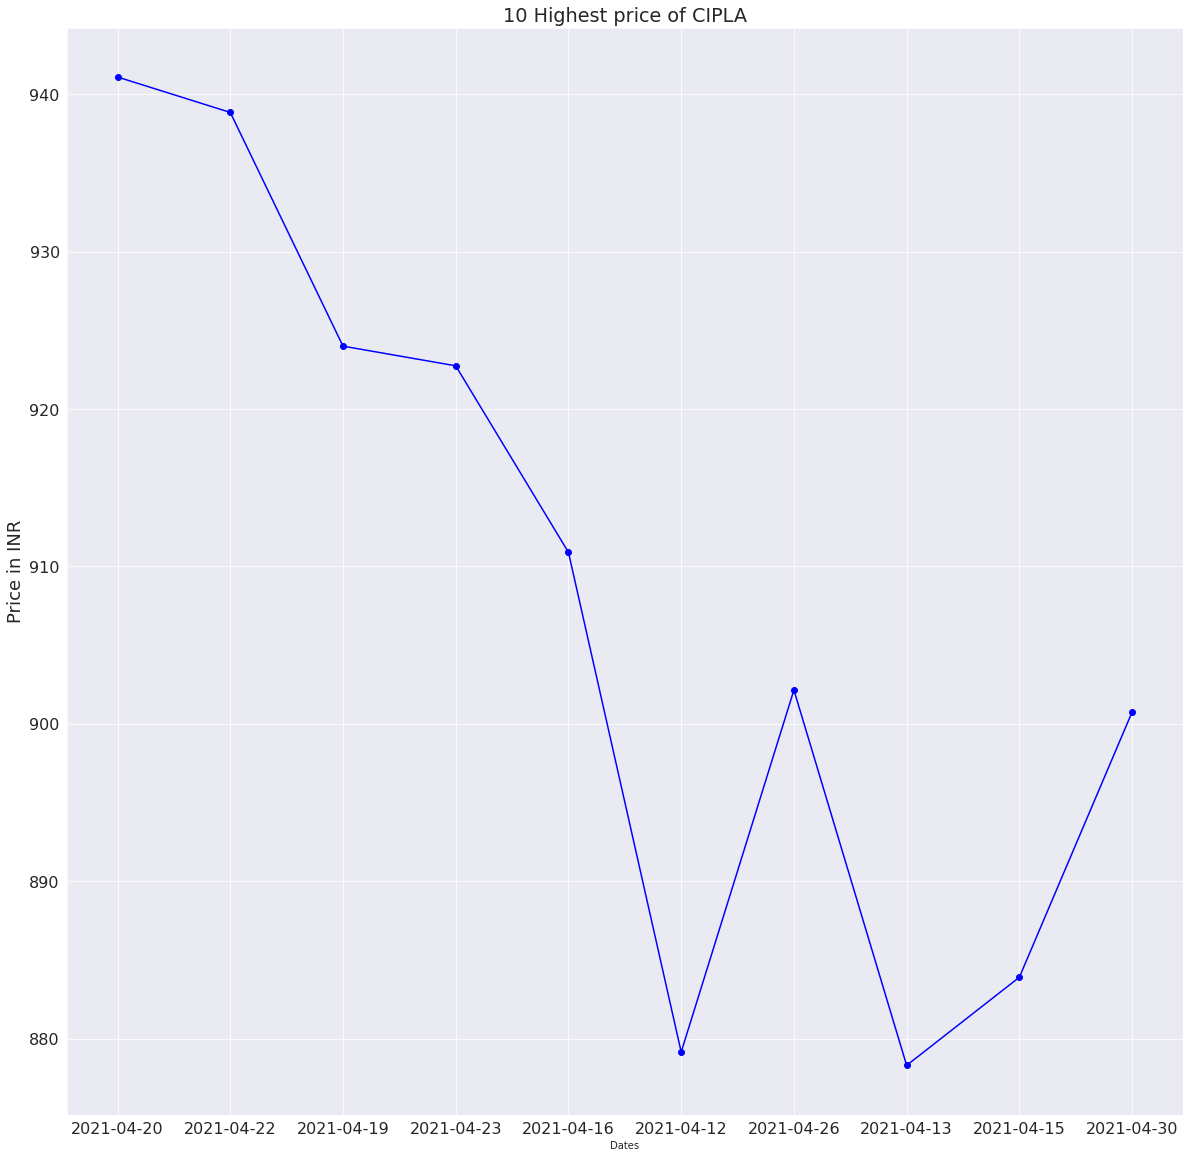

In [ ]:
plt.figure(figsize = (20,20));
plt.plot(high_10_price.Date, high_10_price.Low,'o-b');
plt.xlabel('Dates', size=10);
plt.ylabel('Price in INR', size=18);
plt.title('10 Highest price of CIPLA')

In [ ]:
#Top 10 lowest prices
Low_10_price= data1.sort_values(by='Low', ascending=True).head(10)
Low_10_price

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Intraday Volume
216,2020-03-13,394.75,388.00,434.95,355.30,425.00,425.55,409.52,6096909,2.496795e+14,150719.0,2914082.0,0.4780,3182827.0
220,2020-03-19,386.00,374.80,390.75,362.90,374.75,374.70,376.81,2926155,1.102602e+14,85136.0,949190.0,0.3244,1976965.0
222,2020-03-23,392.80,370.00,406.90,370.00,380.00,375.25,385.56,5507004,2.123288e+14,142970.0,2179840.0,0.3958,3327164.0
221,2020-03-20,374.70,379.80,399.80,372.45,385.20,392.80,391.32,4718358,1.846386e+14,138449.0,2141257.0,0.4538,2577101.0
223,2020-03-24,375.25,380.00,409.75,372.55,379.50,377.45,391.39,6652237,2.603601e+14,167567.0,2632218.0,0.3957,4020019.0
224,2020-03-25,377.45,378.00,394.90,374.00,375.20,376.45,382.10,6419109,2.452757e+14,177940.0,3135740.0,0.4885,3283369.0
225,2020-03-26,376.45,383.00,394.70,380.50,390.00,386.15,386.90,4291225,1.660261e+14,96157.0,1353543.0,0.3154,2937682.0
219,2020-03-18,401.75,411.80,411.80,381.70,390.35,386.00,398.21,4200582,1.672727e+14,114086.0,1879671.0,0.4475,2320911.0
110,2019-10-11,422.15,422.55,443.00,389.55,442.05,441.35,422.49,17354782,7.332271e+14,176315.0,4493599.0,0.2589,12861183.0
218,2020-03-17,396.40,397.00,422.00,390.75,405.00,401.75,410.29,2989674,1.226642e+14,83402.0,900293.0,0.3011,2089381.0


Text(0.5, 1.0, '10 lowest price of CIPLA')

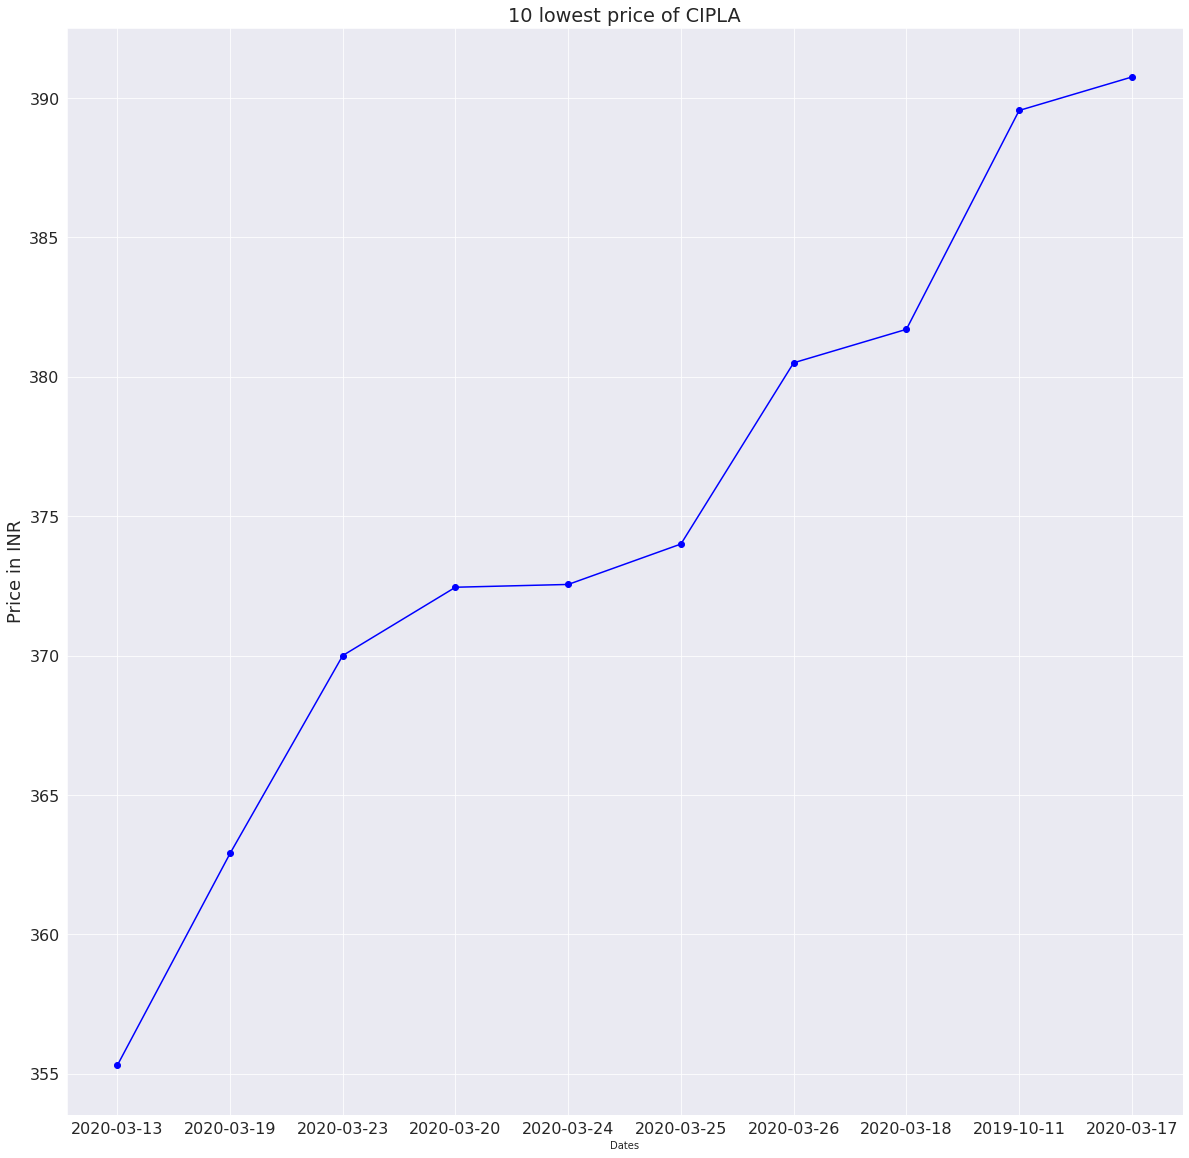

In [ ]:
plt.figure(figsize = (20,20));
plt.plot(Low_10_price.Date, Low_10_price.Low,'o-b');
plt.xlabel('Dates', size=10);
plt.ylabel('Price in INR', size=18);
plt.title('10 lowest price of CIPLA')

From the above 2 graphs it can be seen that 


*   CIPLA's stock price was at extreme lows in March 2020, which is when COVID first hit
*   And now in 2021, it was at all time high in April

We can thus understand covids impact on CIPLA stock








# **Delving deeper into Specific Dates**

In [ ]:
data2 = data
data2.head()

,index,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2850,2011-06-01,326.05,326.05,328.5,324.25,325.70,327.25,326.39,644602,2.103933e+13,13861.0,316448.0,0.4909
1,2851,2011-06-02,327.25,324.00,333.5,324.00,325.60,325.20,329.04,1433409,4.716429e+13,24573.0,747283.0,0.5213
2,2852,2011-06-03,325.20,328.00,328.8,323.35,325.85,324.60,325.81,492898,1.605897e+13,8755.0,215837.0,0.4379
3,2853,2011-06-06,324.60,325.95,332.5,324.00,332.00,331.70,329.90,1655179,5.460432e+13,18585.0,982798.0,0.5938
4,2854,2011-06-07,331.70,331.50,339.0,331.00,337.85,337.60,337.44,2421958,8.172751e+13,25889.0,1544387.0,0.6377


In [ ]:
data2 =  data2.drop('index', axis=1)
data2.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2011-06-01,326.05,326.05,328.5,324.25,325.70,327.25,326.39,644602,2.103933e+13,13861.0,316448.0,0.4909
1,2011-06-02,327.25,324.00,333.5,324.00,325.60,325.20,329.04,1433409,4.716429e+13,24573.0,747283.0,0.5213
2,2011-06-03,325.20,328.00,328.8,323.35,325.85,324.60,325.81,492898,1.605897e+13,8755.0,215837.0,0.4379
3,2011-06-06,324.60,325.95,332.5,324.00,332.00,331.70,329.90,1655179,5.460432e+13,18585.0,982798.0,0.5938
4,2011-06-07,331.70,331.50,339.0,331.00,337.85,337.60,337.44,2421958,8.172751e+13,25889.0,1544387.0,0.6377


In [ ]:
start_date = "2020-02-30"
end_date = "2021-05-30"

mask = (data2['Date'] >= start_date) & (data2['Date'] <= end_date)
data2 = data2.loc[mask]
data2

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2167,2020-03-02,402.10,407.00,411.25,394.65,405.00,401.95,406.44,3460583,1.406523e+14,82668.0,1902720.0,0.5498
2168,2020-03-03,401.95,402.00,429.20,402.00,424.50,425.30,420.06,5476676,2.300515e+14,93117.0,1464448.0,0.2674
2169,2020-03-04,425.30,425.60,449.80,420.00,445.85,447.65,439.56,9297945,4.086987e+14,123174.0,2612536.0,0.2810
2170,2020-03-05,447.65,447.85,472.00,437.45,440.00,440.60,449.13,9637431,4.328415e+14,111026.0,3194447.0,0.3315
2171,2020-03-06,440.60,425.00,438.15,423.05,431.20,434.40,432.51,2916146,1.261269e+14,50806.0,958967.0,0.3288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2021-04-26,935.60,935.60,940.00,902.15,907.95,905.40,914.11,10255697,9.374885e+14,161321.0,3451318.0,0.3365
2452,2021-04-27,905.40,913.00,919.50,901.00,911.20,912.40,909.22,5669049,5.154420e+14,120188.0,1126288.0,0.1987
2453,2021-04-28,912.40,914.35,918.00,902.95,906.25,910.20,909.94,7251009,6.597970e+14,134413.0,1772739.0,0.2445
2454,2021-04-29,910.20,911.95,917.40,904.00,906.00,906.50,910.22,4953091,4.508421e+14,88604.0,1122534.0,0.2266


In [ ]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2167,2020-03-02,402.10,407.00,411.25,394.65,405.00,401.95,406.44,3460583,1.406523e+14,82668.0,1902720.0,0.5498
2168,2020-03-03,401.95,402.00,429.20,402.00,424.50,425.30,420.06,5476676,2.300515e+14,93117.0,1464448.0,0.2674
2169,2020-03-04,425.30,425.60,449.80,420.00,445.85,447.65,439.56,9297945,4.086987e+14,123174.0,2612536.0,0.2810
2170,2020-03-05,447.65,447.85,472.00,437.45,440.00,440.60,449.13,9637431,4.328415e+14,111026.0,3194447.0,0.3315
2171,2020-03-06,440.60,425.00,438.15,423.05,431.20,434.40,432.51,2916146,1.261269e+14,50806.0,958967.0,0.3288


Since the march 2020 month saw a drop, we will analyse that month


To see the difference before and after covid

In [ ]:
data2 = data2.set_index('Date')
data2.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=289, freq=None)

In [ ]:
#Data of march 2020
data2['2020-03'].head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2020-03-02,402.10,407.00,411.25,394.65,405.00,401.95,406.44,3460583,1.406523e+14,82668.0,1902720.0,0.5498
2020-03-03,401.95,402.00,429.20,402.00,424.50,425.30,420.06,5476676,2.300515e+14,93117.0,1464448.0,0.2674
2020-03-04,425.30,425.60,449.80,420.00,445.85,447.65,439.56,9297945,4.086987e+14,123174.0,2612536.0,0.2810
2020-03-05,447.65,447.85,472.00,437.45,440.00,440.60,449.13,9637431,4.328415e+14,111026.0,3194447.0,0.3315
2020-03-06,440.60,425.00,438.15,423.05,431.20,434.40,432.51,2916146,1.261269e+14,50806.0,958967.0,0.3288


In [ ]:
#Average closing price for march 2020
data2['2020-03'].Close.mean()

406.79285714285714

Text(0, 0.5, 'Stock Prices')

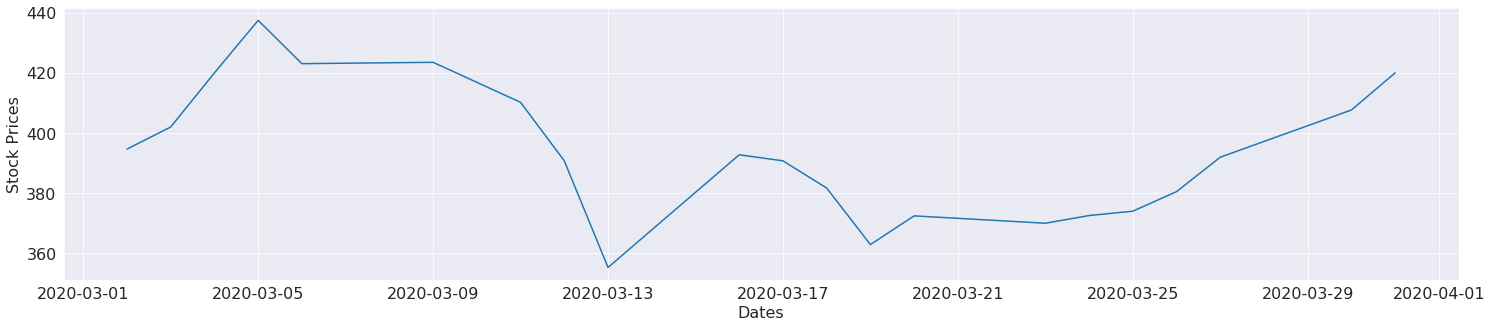

In [ ]:
#The graph of march 2020- LOW VALUES
plt.figure(figsize = (25,5))
plt.plot(data2['2020-03'].Low)
plt.xlabel("Dates")
plt.ylabel("Stock Prices")

Text(0, 0.5, 'Average Price')

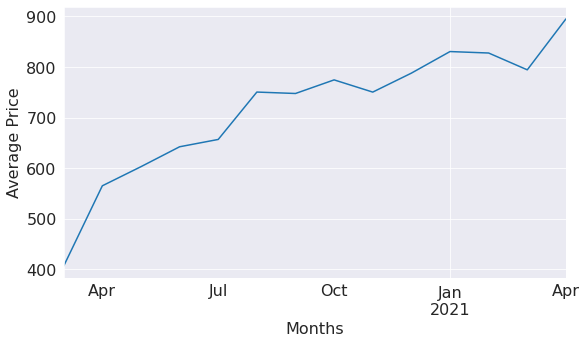

In [ ]:
#Monthly average close prices
data2.Close.resample('M').mean()
data2.Close.resample('M').mean().plot()
plt.xlabel("Months")
plt.ylabel("Average Price")

Above we can see the average closing prices low in March-April 2020 due to COVID

They have picked up in Jan 2021 and are at all time high in april 2021

Finding Monthly return change to see impact of COVID

In [ ]:
monthly_return = data2['Close'].resample('M').ffill().pct_change()
monthly_return

Date
2020-03-31         NaN
2020-04-30    0.394348
2020-05-31    0.099305
2020-06-30   -0.012189
2020-07-31    0.124795
2020-08-31   -0.009165
2020-09-30    0.085698
2020-10-31   -0.026075
2020-11-30   -0.011796
2020-12-31    0.099718
2021-01-31    0.007257
2021-02-28   -0.047040
2021-03-31    0.035639
2021-04-30    0.116857
Freq: M, Name: Close, dtype: float64

In [ ]:
monthly_return.max()

0.39434787749793077

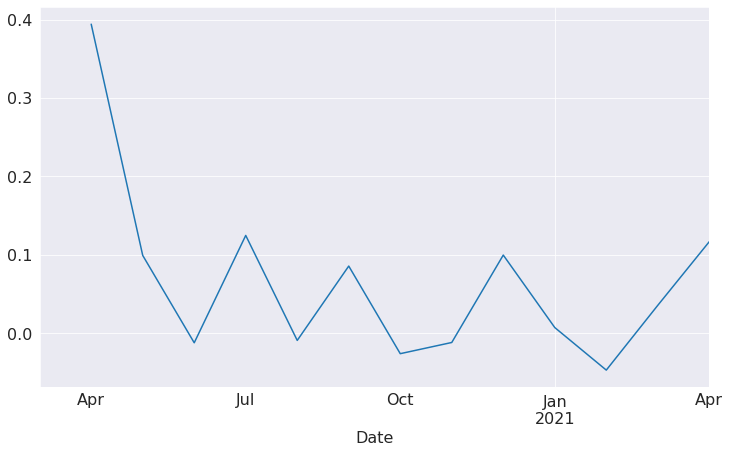

In [ ]:
#Plotting a graph to visualize mothly returns
monthly_return.plot(figsize=(12,7))

# **Shareholding Pattern**

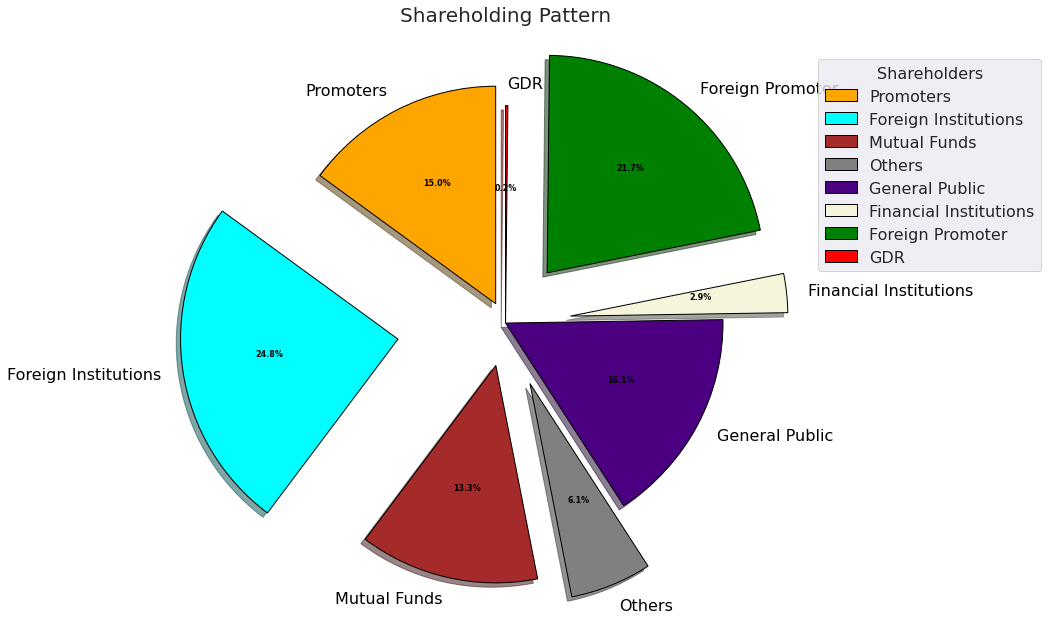

In [ ]:
#dataset
shareholders = ["Promoters","Foreign Institutions","Mutual Funds","Others",
                "General Public","Financial Institutions","Foreign Promoter","GDR" ]

no_of_Shares = [120767784,199835670,107565349,48839874,
                129968452,23335280,174907187,1377157]

explode = (0.1, 0.5, 0.2, 0.3, 0.0, 0.3, 0.3, 0.0)

colors = ( "orange", "cyan", "brown","grey",
         "indigo", "beige","green","red")
  
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

def func(pct, allvalues):
    absolute = int(pct / 100.* np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)



fig, ax = plt.subplots(figsize=(12,10))
wedges, texts, autotexts = ax.pie(no_of_Shares, 
                                  autopct = lambda pct: func(pct, no_of_Shares),
                                  explode = explode, 
                                  labels = shareholders,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

ax.legend(wedges, shareholders,
          title ="Shareholders",
          loc ="upper right",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Shareholding Pattern",fontsize=20,loc="center",pad=30)

plt.show()


**Summary**


*  The lowest price of CIPLA was on 13th March 2020 due to COVID
*  Monthly returns highest in April 2020 then started to fall
*  The highest price was on 20th march 2021, a year after the COVID crash
*   Maximum volume was seen on 10th August 2020.
*  Initially the price fell due to COVID, but recovered quickly towards the end of 2020. Towards the end of the first quarter of 2021 it was at an all time high



